In [11]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import pandas as pd
from konlpy.tag import Okt
import os
from collections import Counter

path = os.getcwd()

# pd.set_option('display.max_columns',8)
kor_df = pd.read_excel(path + "/data/clean_kor.xlsx", engine='openpyxl')

In [12]:
tagger = Okt()
kor_nouns = kor_df['kor_nouns'].apply(lambda x: tagger.nouns(x))
transactions = kor_nouns.tolist()
transactions

[['속눈썹'],
 ['입술', '색', '발라'],
 ['노력', '코로나', '사망자', '영안', '눈물', '의료', '의료', '코로나', '코로나', '사망자'],
 ['스토리', '살짝', '피드', '올릴랭', '티엠', '말', '하자', '화표', '코로나'],
 ['리스',
  '남친',
  '코디',
  '미니',
  '미니',
  '코로나',
  '얼룩',
  '캐',
  '주얼',
  '캐',
  '주얼',
  '코디',
  '스탠다드',
  '학원',
  '리스',
  '리스',
  '코드',
  '라피',
  '나이키',
  '볼텍스'],
 ['스타', '스타', '천안', '코로나', '코로나'],
 ['이유', '뭐'],
 [],
 ['커피', '심장', '세근'],
 ['눈앞',
  '성적',
  '앞',
  '성장',
  '은',
  '써밋',
  '대교',
  '써밋',
  '써밋',
  '눈높이',
  '장판',
  '장판',
  '덕분',
  '코로나',
  '학력',
  '격차',
  '실행',
  '원조',
  '학습',
  '써밋'],
 ['알',
  '근르가즘',
  '스타',
  '운동',
  '스타',
  '헬',
  '스타',
  '헬스',
  '스포',
  '애니',
  '헬스장',
  '금요일',
  '운동',
  '코로나',
  '헬린',
  '벌',
  '업',
  '현실',
  '돼지'],
 ['휘트니', '스', '기점', '코로나', '예방', '매일', '방역', '소독', '안심', '운동'],
 ['방역',
  '칙',
  '인',
  '집합',
  '금지',
  '인',
  '상모',
  '임금',
  '헌팅',
  '포차',
  '류',
  '술집',
  '서서',
  '아침',
  '술',
  '헌팅',
  '이야기',
  '예끼',
  '요',
  '털',
  '사면',
  '바리',
  '벌레',
  '라며',
  '일찍',
  '줏어',
  '새',
  '새끼',
  '열정',


In [13]:
te = TransactionEncoder()
dataset = te.fit(transactions).transform(transactions)
df = pd.DataFrame(data=dataset, columns=te.columns_)
df

,가게,가격,가계,가공,가구,가기,가까이,가끔,가나,가내,...,희생,흰소,히나타,히든,히알루론산,히터,힐러리,힘드렁,힙업,힝
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
data = apriori(df, use_colnames=True, min_support=700/10000, max_len=2)
association_data = association_rules(data, metric="confidence", min_threshold=0.1)
association_data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(마스크),(코로나),0.098098,0.771772,0.082082,0.836735,1.084174,0.006373,1.397898
1,(코로나),(마스크),0.771772,0.098098,0.082082,0.106355,1.084174,0.006373,1.009240
2,(코로나),(맛집),0.771772,0.101101,0.098098,0.127108,1.257233,0.020071,1.029794
3,(맛집),(코로나),0.101101,0.771772,0.098098,0.970297,1.257233,0.020071,7.683684
4,(스타),(코로나),0.204204,0.771772,0.197197,0.965686,1.251259,0.039598,6.651223
5,(코로나),(스타),0.771772,0.204204,0.197197,0.255512,1.251259,0.039598,1.068917
6,(운동),(코로나),0.085085,0.771772,0.077077,0.905882,1.173770,0.011411,2.424925


In [60]:
with open(path + "/data/korean_stopwords.txt", encoding='utf8') as file:
    kor_stopword = file.readlines()
    kor_stopwords = [x.strip() for x in kor_stopword]
    file.close()
# 수동적으로 필터링할 단어

def filter_kor_noun(content):
    tagger = Okt()
    nouns = tagger.nouns(content)
    noun = [noun for noun in nouns if noun not in kor_stopwords]

    return noun

corpus = "".join(kor_df['kor_content'])
filtered_kor = filter_kor_noun(corpus)
node_count = Counter(filtered_kor)

node_df = pd.DataFrame(node_count.items(), columns=['node','nodesize'])

node_df = node_df[node_df['nodesize']>=80]

print(node_df)
print(node_df.shape)

     node  nodesize
5     코로나      1274
33     스타       339
57     운동       195
59     헬스        86
74     방역       126
214   마스크       157
231    여행       109
297    부산       115
325    맛집       287
494    울산       164
810     짐        84
1985   네일       176
3831   갈비       107
(13, 2)


[[31850, 8475, 4875, 2150, 3150, 3925, 2725, 2875, 7175, 4100, 2100, 4400, 2675], [31850, 8475, 4875, 2150, 3150, 3925, 2725, 2875, 7175, 4100, 2100, 4400, 2675], [31850, 8475, 4875, 2150, 3150, 3925, 2725, 2875, 7175, 4100, 2100, 4400, 2675], [31850, 8475, 4875, 2150, 3150, 3925, 2725, 2875, 7175, 4100, 2100, 4400, 2675], [31850, 8475, 4875, 2150, 3150, 3925, 2725, 2875, 7175, 4100, 2100, 4400, 2675], [31850, 8475, 4875, 2150, 3150, 3925, 2725, 2875, 7175, 4100, 2100, 4400, 2675], [31850, 8475, 4875, 2150, 3150, 3925, 2725, 2875, 7175, 4100, 2100, 4400, 2675], [31850, 8475, 4875, 2150, 3150, 3925, 2725, 2875, 7175, 4100, 2100, 4400, 2675], [31850, 8475, 4875, 2150, 3150, 3925, 2725, 2875, 7175, 4100, 2100, 4400, 2675], [31850, 8475, 4875, 2150, 3150, 3925, 2725, 2875, 7175, 4100, 2100, 4400, 2675], [31850, 8475, 4875, 2150, 3150, 3925, 2725, 2875, 7175, 4100, 2100, 4400, 2675], [31850, 8475, 4875, 2150, 3150, 3925, 2725, 2875, 7175, 4100, 2100, 4400, 2675], [31850, 8475, 4875, 2150, 3

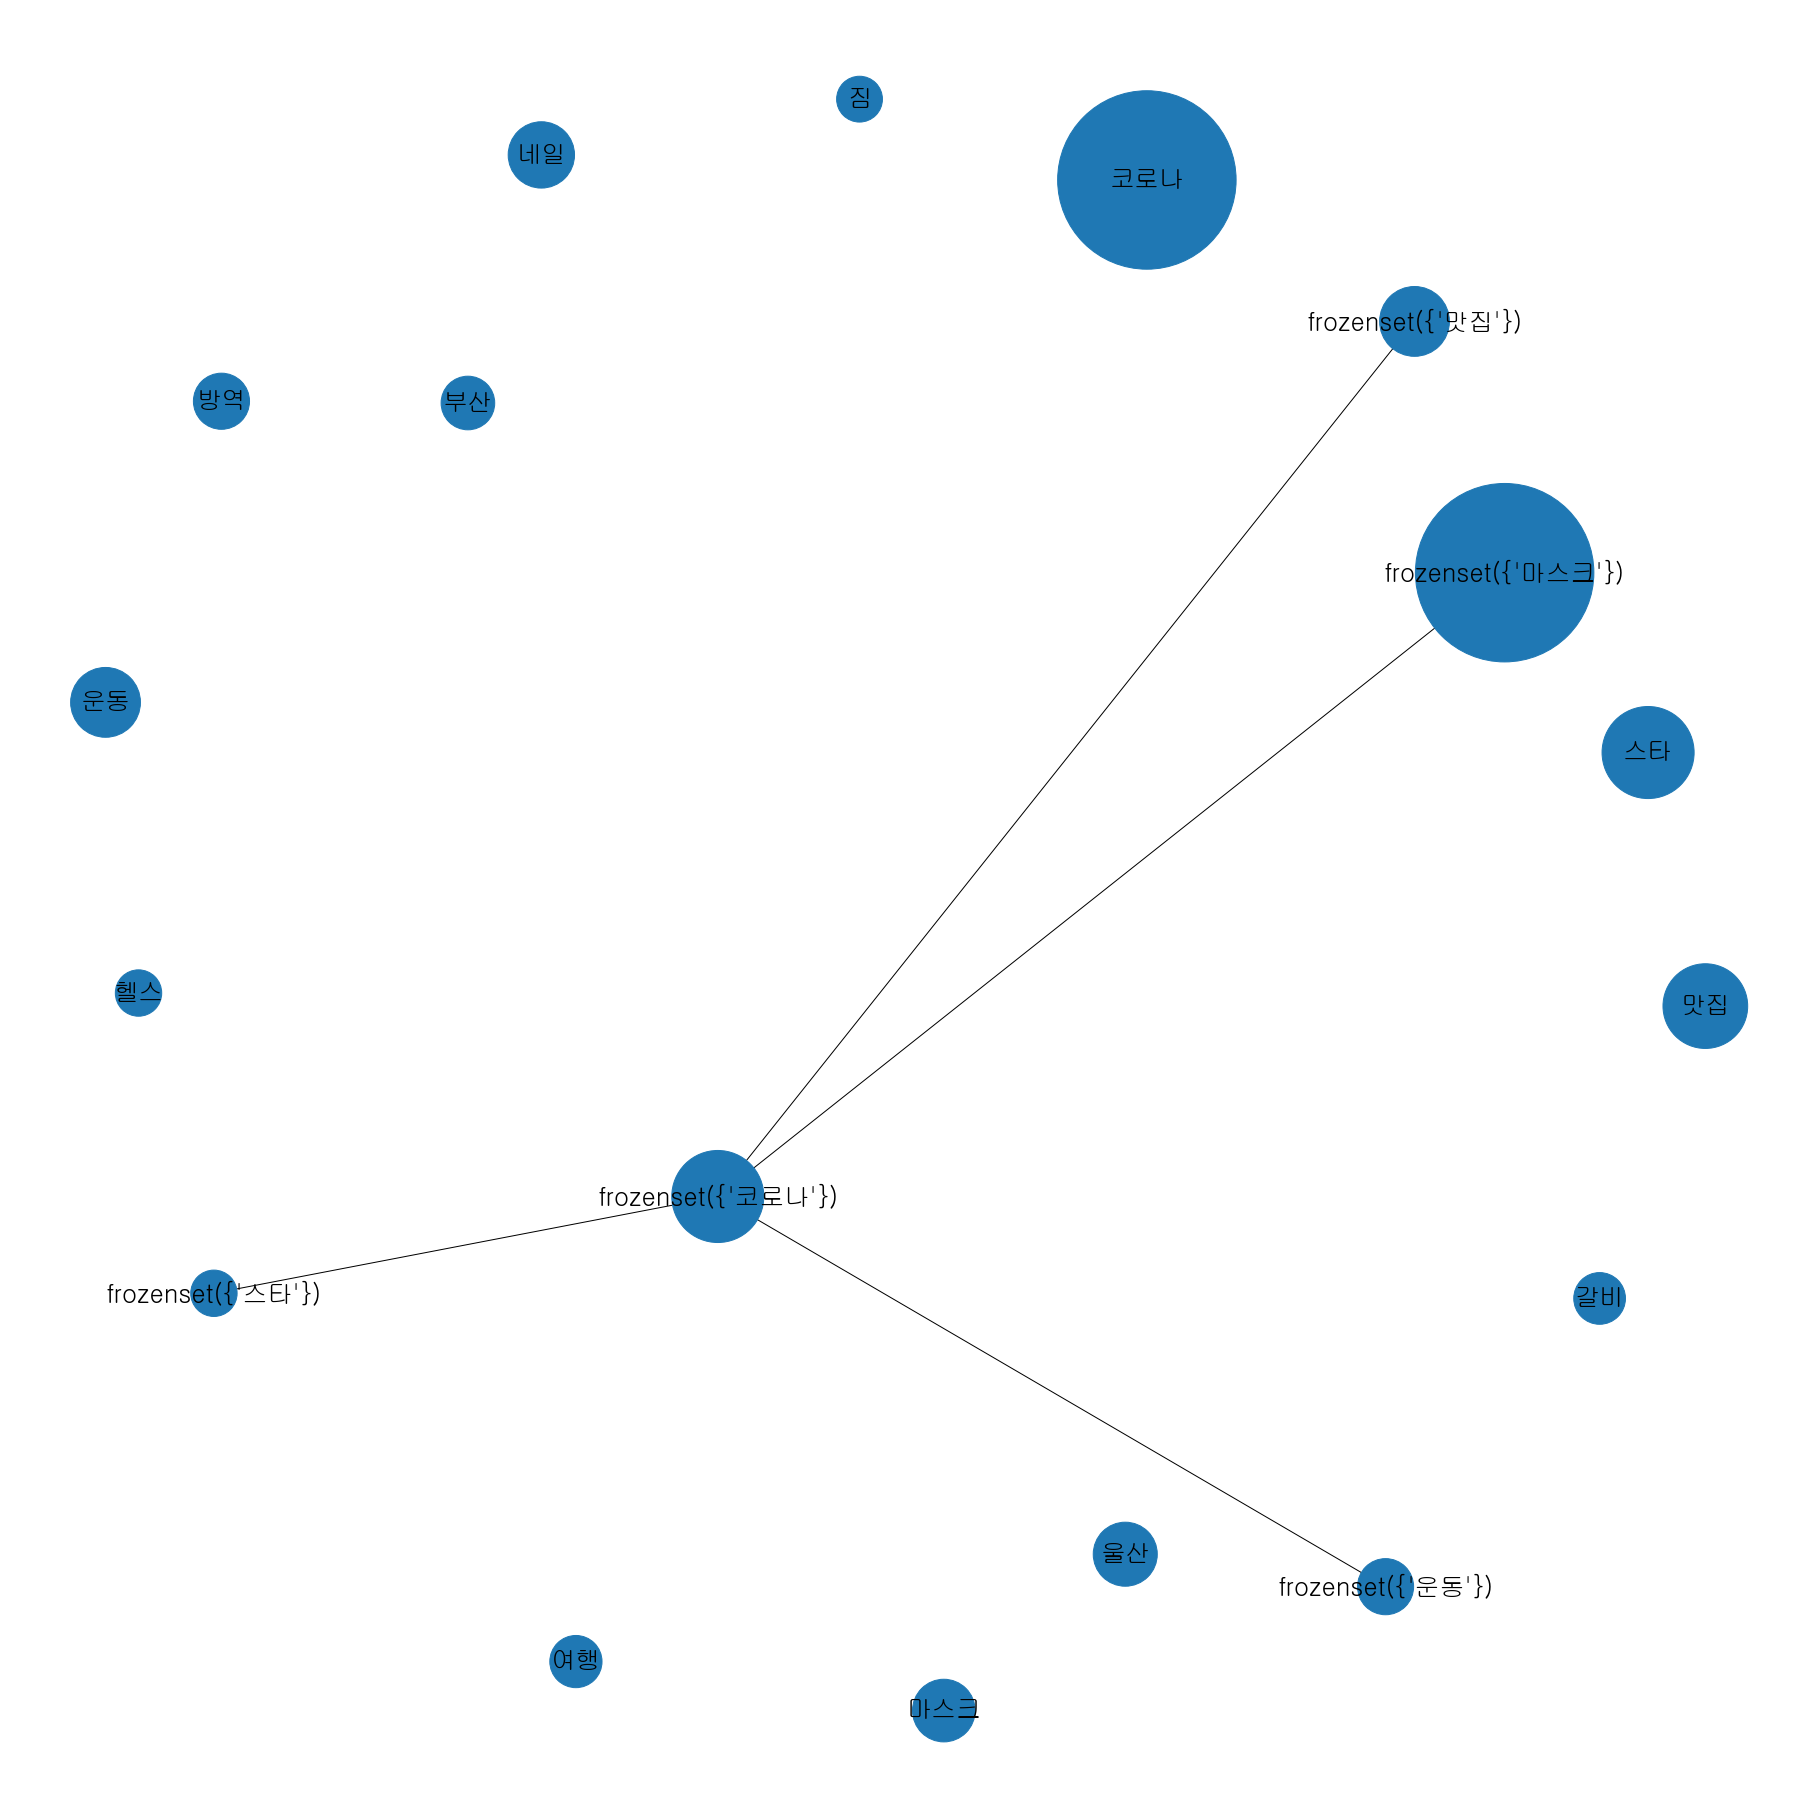

In [73]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))

graph = nx.Graph()

for index, row in node_df.iterrows():
    graph.add_node(row['node'], nodesize=row['nodesize']*25)

# print("node: {}".format( [graph.nodes[node]['nodesize'] for node in graph] ) )

for index, row in association_data.iterrows():
    graph.add_weighted_edges_from([(row['antecedents'], row['consequents'], row ['support'])])

# print("weight: {}".format( [graph.nodes[node] for node in graph] ) )
# print("node: {}".format( [graph.nodes[node] for node in graph] ) )
#제한된 노드(단어) 수보다 많은 단어 검출되면 에러

pos = nx.spring_layout(graph, k=0.8, iterations=50)

# print("weight: {}".format( [graph.nodes[node] for node in graph] ) )
# print("node: {}".format( [graph.nodes[node]['nodesize'] for node in graph] ) )

# sizes = [graph.nodes[node]['nodesize']*25 for node in graph]
sizes = [list(nx.get_node_attributes(graph, 'nodesize').values()) for node in graph]
print(sizes)
nx.draw(graph, pos=pos, node_size=sizes)

nx.draw_networkx_labels(graph, pos=pos, font_family='gulim', font_size=25)

ax = plt.gca()
print(ax)
plt.show()